# Проект: Линейные модели в машинном обучении
<br>
**Модель МО для молочного хозяйства «Вольный луг»"**
<br>
<br>
**Описание проекта**
<br>
<br>
Мы работаем в IT-компании, которая выполняет на заказ проекты по машинному обучению. К нам обратился фермер, владелец молочного хозяйства «Вольный луг». Он планирует расширить поголовье стада коров. Для этого он заключил контракт с ассоциацией пастбищ «ЭкоФерма».
<br>
Условия контракта позволяют фермеру тщательно отобрать коров. Необходимо произвести отбор коров подходящих под критерии удоя, не менее 6000 килограммов молока высокого качества (по вкусу) в год. Для этого нам необходимо разработать модель машинного обучения, которая поможет управлять рисками и принимать оптимальное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. 
<br>
<br>Нам нужно создать две прогнозные модели для отбора коров в поголовье:
<br>Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
<br>Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).
<br>
<br>С помощью модели нужно отобрать коров по двум критериям:
<br>1. средний удой за год — не менее 6000 килограммов;
<br>2. молоко должно быть вкусным.
<br>
<br>


**Описание данных**
<br>
<br>
Работать предстоит с тремя датасетами:
<br>
ferma_main.csv
<br>ferma_dad.csv
<br>cow_buy.csv
<br>
<br>Файл ferma_main.csv содержит данные о стаде фермера на текущий момент. 
<br>Описание данных:
<br>id — уникальный идентификатор коровы.
<br>Удой, кг — масса молока, которую корова даёт в год (в килограммах).
<br>ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
<br>Сырой протеин, г — содержание сырого протеина в корме (в граммах).
<br>СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
<br>Порода — порода коровы.
<br>Тип пастбища — ландшафт лугов, на которых паслась корова.
<br>порода папы_быка — порода папы коровы.
<br>Жирность,% — содержание жиров в молоке (в процентах).
<br>Белок,% — содержание белков в молоке (в процентах).
<br>Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
<br>Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).
<br>
<br>Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера. 
<br>Описание данных:
<br>id — уникальный идентификатор коровы.
<br>Имя Папы — имя папы коровы.
<br>
<br>Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. 
<br>Описание данных:
<br>Порода — порода коровы.
<br>Тип пастбища — ландшафт лугов, на которых паслась корова.
<br>порода папы_быка — порода папы коровы.
<br>Имя_папы — имя папы коровы.
<br>Текущая_жирность,% — содержание жиров в молоке (в процентах).
<br>Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
<br>Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).


**План работ:**
<br>Ознакомление с полученными данными.
<br>Предобработка данных, вклющающая в себя работу с пропусками и дубликатами, преобразование типов данных, там где это необходимо.
<br>Исследовательский анализ данных с визуализацией и промежуточными выводами.
<br>Корреляционный анализ данных
<br>Обучение модели линейной регрессии
<br>Обучение модели логистической регрессии
<br>Сравнение моделей
<br>Итоговый вывод по результатам работы

## Загрузка данных

In [259]:
# Импортируем необходимые нам библиотеки
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import binom, norm, spearmanr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    r2_score, 
    mean_squared_error, 
    mean_absolute_error, 
    accuracy_score, 
    confusion_matrix, 
    recall_score, 
    precision_score
)


In [260]:
# Загрузим данные ferma_main, выбрав верный разделитель. Ознакомимся с содержимым.
ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep = ';', decimal=',')
ferma_main.info()
ferma_main.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет
5,6,5254,12.7,1806,0.885,РефлешнСоверинг,Холмистое,Соверин,3.13,3.078,вкусно,менее_2_лет
6,7,5910,13.2,1792,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.48,3.077,вкусно,более_2_лет
7,8,6179,14.7,1806,0.930,Вис Бик Айдиал,Равнинные,Айдиал,3.55,3.076,вкусно,более_2_лет
8,9,6783,14.2,1918,0.940,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.077,вкусно,более_2_лет
9,10,5339,13.4,1791,0.895,Вис Бик Айдиал,Холмистое,Соверин,3.13,3.075,вкусно,менее_2_лет


Данные содержат 12 столбцов и 634 строки. Обращает на себя внимание различный стиль в названиях стобцов, в наименованиях типов пастбищ и пород коров. Тип данных в норме, пропусков нет. Оптимизируем выявленные недостатки на этапе предобработки данных.

In [261]:
# Загрузим данные ferma_dad, выбрав верный разделитель. Ознакомимся с содержимым.
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep = ';', decimal=',')
ferma_dad.info()
ferma_dad.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
5,6,Барин
6,7,Соловчик
7,8,Геркулес
8,9,Буйный
9,10,Барин


Данные содержат 2 столбца и 629 строк, содержат инфорацию о кличке отца коров. Тип данных в норме, пропусков нет.

In [262]:
# Загрузим данные cow_buy, выбрав верный разделитель. Ознакомимся с содержимым.
cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep = ';', decimal=',')
cow_buy.info()
cow_buy.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


Данные содержат 7 столбцов и 20 строк. Опять обращает на себя внимание различный стиль в названиях стобцов,типах пастбищ и породах коров. Оптимизируем выявленные недостатки на этапе предобработки данных. Тип данных в норме, пропусков нет.

##  Предобработка данных

**Датасет ferma_main**

In [263]:
ferma_main

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
629,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
630,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
631,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
632,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет


In [264]:
ferma_main.describe()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),"Жирность,%","Белок,%"
count,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000
mean,317.460568,6187.025237,14.542744,1922.682965,0.912855,3.603943,3.075666
std,183.096982,1638.401021,1.301301,182.392548,0.032209,0.168020,0.002540
min,1.000000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,159.250000,5751.750000,13.500000,1772.250000,0.890000,3.590000,3.074000
50%,317.500000,6130.500000,14.700000,1880.500000,0.930000,3.650000,3.076000
75%,475.750000,6501.000000,15.600000,2058.750000,0.940000,3.720000,3.077000
max,629.000000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


При выводе основных статистических параметров числовых столбцов датасета, обращает на себя внимание наличие выброса (выбросов) в данных 'удой' (max=45616 кг/год). Это явный выброс (или выбросы). 
<br>
Удалим строки с удоем более 40000 кг/год и еще раз рассчитаем статитические параметры



In [265]:
ferma_main = ferma_main[ferma_main['Удой, кг'] < 40000]
ferma_main.describe()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),"Жирность,%","Белок,%"
count,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000
mean,317.935229,6124.736177,14.547551,1923.074250,0.912828,3.604550,3.075665
std,182.850982,474.172345,1.296684,182.270289,0.032227,0.167456,0.002542
min,1.000000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,160.000000,5751.000000,13.500000,1773.000000,0.890000,3.590000,3.074000
50%,318.000000,6130.000000,14.700000,1881.000000,0.930000,3.650000,3.076000
75%,476.000000,6501.000000,15.600000,2059.000000,0.940000,3.720000,3.077000
max,629.000000,7222.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


Датасет сократился на одну строчку (стало 628 строк), статистические параметры пришли в норму, максимальный удой составил 7222 кг/год.

In [266]:
# Оптимизируем для удобства работы наименования столбцов: оставим кириллицу, сократим лишнее и перепишем в "змеином стиле"
ferma_main.columns = ferma_main.columns.str.replace(' ', '_')
ferma_main.columns = ferma_main.columns.str.lower()
#ferma_main.columns
ferma_main.columns = ['id', 'удой', 'эке', 'сырой_протеин', 'спо', 'порода',
       'тип_пастбища', 'порода_папы_быка', 'жирность', 'белок', 'вкус_молока',
       'возраст']

In [267]:
ferma_main.head(10)

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет
5,6,5254,12.7,1806,0.885,РефлешнСоверинг,Холмистое,Соверин,3.13,3.078,вкусно,менее_2_лет
6,7,5910,13.2,1792,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.48,3.077,вкусно,более_2_лет
7,8,6179,14.7,1806,0.930,Вис Бик Айдиал,Равнинные,Айдиал,3.55,3.076,вкусно,более_2_лет
8,9,6783,14.2,1918,0.940,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.077,вкусно,более_2_лет
9,10,5339,13.4,1791,0.895,Вис Бик Айдиал,Холмистое,Соверин,3.13,3.075,вкусно,менее_2_лет


In [268]:
# Проверим данные на пропуски
ferma_main.isna().sum()

id                  0
удой                0
эке                 0
сырой_протеин       0
спо                 0
порода              0
тип_пастбища        0
порода_папы_быка    0
жирность            0
белок               0
вкус_молока         0
возраст             0
dtype: int64

In [269]:
# Проверим данные на дубликаты
ferma_main.duplicated().sum()

5

In [270]:
# Удалим дубликаты
ferma_main.drop_duplicates(inplace=True)
ferma_main.duplicated().sum()

0

In [271]:
import warnings
warnings.filterwarnings('ignore') 

In [272]:
# Проверим датасет на неявные дубликаты
print(ferma_main['порода'].unique())
print(ferma_main['тип_пастбища'].unique())
print(ferma_main['порода_папы_быка'].unique())
print(ferma_main['вкус_молока'].unique())
print(ferma_main['возраст'].unique())

['Вис Бик Айдиал' 'РефлешнСоверинг']
['Равнинное' 'Равнинные' 'Холмистое']
['Айдиал' 'Соверин' 'Айдиалл']
['вкусно' 'не вкусно']
['более_2_лет' 'менее_2_лет']


Обнаружены неявные дубликаты в столбцах 'тип_пастбища' ('Равнинное'-'Равнинные') и в 'порода_папы_быка' ('Айдиал'-'Айдиалл'). 
<br>
Также необходимо исправить 'РефлешнСоверинг' на 'Рефлешн Соверинг', убрать "змеиный стиль" в столбце 'возраст' и избавиться от заглавных букв в данных столбца 'тип_пастбища'. 

In [273]:
ferma_main['порода'] = ferma_main['порода'].str.replace('РефлешнСоверинг', 'Рефлешн Соверинг')
ferma_main['тип_пастбища'] = ferma_main['тип_пастбища'].str.replace('Равнинные', 'Равнинное')
ferma_main['порода_папы_быка'] = ferma_main['порода_папы_быка'].str.replace('Айдиалл', 'Айдиал')
ferma_main['возраст'] = ferma_main['возраст'].str.replace('_', ' ')
ferma_main['тип_пастбища'] = ferma_main['тип_пастбища'].str.lower()

In [274]:
import warnings
warnings.filterwarnings('ignore') 

In [275]:
# Проверим результат исправлений
print(ferma_main['порода'].unique())
print(ferma_main['тип_пастбища'].unique())
print(ferma_main['порода_папы_быка'].unique())
print(ferma_main['возраст'].unique())

['Вис Бик Айдиал' 'Рефлешн Соверинг']
['равнинное' 'холмистое']
['Айдиал' 'Соверин']
['более 2 лет' 'менее 2 лет']


**Датасет ferma_dad**

In [276]:
# Исправим наименование столбца 'Имя Папы'
#ferma_dad.columns
ferma_dad.columns = ['id', 'имя_папы']
ferma_dad

,id,имя_папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
...,...,...
624,625,Буйный
625,626,Барин
626,627,Барин
627,628,Барин


In [277]:
# Проверим данные на пропуски
ferma_dad.isna().sum()

id          0
имя_папы    0
dtype: int64

In [278]:
# Проверим данные на дубликаты
ferma_dad.duplicated().sum()

0

In [279]:
# Проверим датасет на неявные дубликаты
ferma_dad['имя_папы'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

**Датасет cow_buy**

In [280]:
# Оптимизируем аналогично преобразованиям предыдущих датасетов
cow_buy.columns = cow_buy.columns.str.replace(' ', '_')
cow_buy.columns = cow_buy.columns.str.lower()
#cow_buy.columns
cow_buy.columns = ['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы',
       'текущая_жирность', 'текущий_уровень_белок', 'возраст']
cow_buy.head(10)

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


In [281]:
# Проверим данные на пропуски
cow_buy.isna().sum()

порода                   0
тип_пастбища             0
порода_папы_быка         0
имя_папы                 0
текущая_жирность         0
текущий_уровень_белок    0
возраст                  0
dtype: int64

In [282]:
# Проверим данные на дубликаты
#cow_buy.duplicated()
cow_buy.duplicated().sum()

4

In [283]:
# Выведем дубликаты

cow_buy[cow_buy.duplicated()]

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
14,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


Явный дубликат только один. Удалим его.

In [284]:
cow_buy = cow_buy.drop(index=8)

In [285]:
# Проверим датасет на неявные дубликаты
print(cow_buy['порода'].unique())
print(cow_buy['тип_пастбища'].unique())
print(cow_buy['порода_папы_быка'].unique())
print(cow_buy['имя_папы'].unique())
print(cow_buy['возраст'].unique())

['Вис Бик Айдиал' 'РефлешнСоверинг']
['холмистое' 'равнинное']
['Айдиал' 'Соверин']
['Геркулес' 'Буйный' 'Барин' 'Соловчик']
['более_2_лет' 'менее_2_лет']


Неявные дубликаты не обнаружены. 
<br>
Необходимо исправить 'РефлешнСоверинг' на 'Рефлешн Соверинг' и убрать "змеиный стиль" в столбце 'возраст'. 

In [286]:
cow_buy['порода'] = cow_buy['порода'].str.replace('РефлешнСоверинг', 'Рефлешн Соверинг')
cow_buy['возраст'] = cow_buy['возраст'].str.replace('_', ' ')

In [287]:
# Проверим данные после исправлений
print(cow_buy['порода'].unique())
print(cow_buy['возраст'].unique())

['Вис Бик Айдиал' 'Рефлешн Соверинг']
['более 2 лет' 'менее 2 лет']


На этапе предобработки данных мы проверили датасеты на наличие пропусков (не обнаружено), выявили и удалили явные дубликаты, обработали неявные дубликаты. Оптимизировали стиль строчных данных и заголовков столбцов. Удалили выброс в данных параметра 'удой'.
<br>
<br>
Данные готовы к исследовательскому анализу.

## Исследовательский анализ данных

**Датасет ferma_main**

In [288]:
ferma_main

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более 2 лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее 2 лет
2,3,5810,14.0,1854,0.885,Рефлешн Соверинг,холмистое,Соверин,3.59,3.074,не вкусно,более 2 лет
3,4,5895,12.4,2012,0.885,Рефлешн Соверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более 2 лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее 2 лет
...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,6812,15.4,1964,0.940,Рефлешн Соверинг,равнинное,Айдиал,3.74,3.075,не вкусно,более 2 лет
625,626,5513,12.9,1700,0.880,Рефлешн Соверинг,равнинное,Соверин,3.64,3.073,вкусно,менее 2 лет
626,627,5970,14.4,1837,0.880,Рефлешн Соверинг,холмистое,Соверин,3.64,3.075,не вкусно,более 2 лет
627,628,5746,13.8,1994,0.890,Рефлешн Соверинг,равнинное,Соверин,3.64,3.077,вкусно,более 2 лет


Выведем графики и проанализируем категориальные данные.

In [289]:
# Создадим функцию вывода круговой диаграммы для категориальных данных
def pie_cat (a, b, c, d):
    group_tab = a.groupby(b).size()/len(a)
    group_tab.plot(kind='pie', autopct = '%1.0f%%')
    plt.title(f'{c}')
    plt.ylabel(f'{d}')
    plt.show()

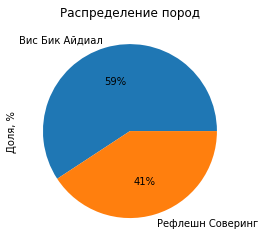

In [290]:
# Выведем диаграмму распределения пород
a=ferma_main
b='порода'
c='Распределение пород'
d='Доля, %'
pie_cat(a, b, c, d)

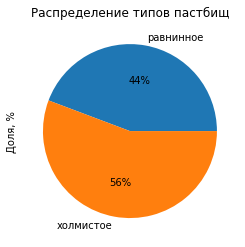

In [291]:
# Выведем диаграмму распределения типов пастбищ
a=ferma_main
b='тип_пастбища'
c='Распределение типов пастбищ'
d='Доля, %'
pie_cat(a, b, c, d)

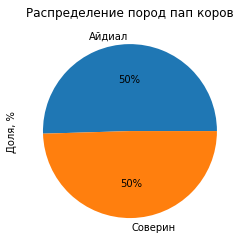

In [292]:
# Выведем диаграмму распределения пород пап коров
a=ferma_main
b='порода_папы_быка'
c='Распределение пород пап коров'
d='Доля, %'
pie_cat(a, b, c, d)

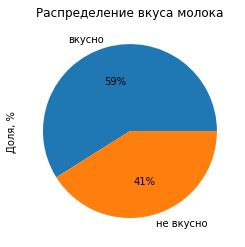

In [293]:
# Выведем диаграмму распределения вкуса молока
a=ferma_main
b='вкус_молока'
c='Распределение вкуса молока'
d='Доля, %'
pie_cat(a, b, c, d)

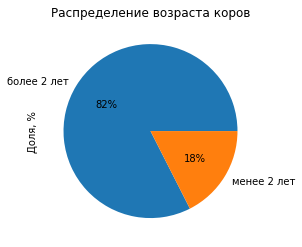

In [294]:
# Выведем диаграмму распределения возраста коров
a=ferma_main
b='возраст'
c='Распределение возраста коров'
d='Доля, %'
pie_cat(a, b, c, d)

Соотношение в данных пород пап коров составляет 50/50, возраста коров 82/18, по остальным категориальным данным примерно одинаковое и составляет 60/40.

Выведем графики и проанализируем числовые данные.

In [295]:
ferma_main.head(3)

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более 2 лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее 2 лет
2,3,5810,14.0,1854,0.885,Рефлешн Соверинг,холмистое,Соверин,3.59,3.074,не вкусно,более 2 лет


In [296]:
# Создадим функцию вывода гистограммы распределения для числовых данных
def hist_num (a, b, c, d, e):
    plt.figure(figsize=(10, 6))
    a[b].plot(kind = 'hist', grid=True, bins=e)
    plt.title(f'{c}')
    plt.ylabel('Частота')
    plt.xlabel(f'{d}')
    plt.show()
    print(a[b].describe())

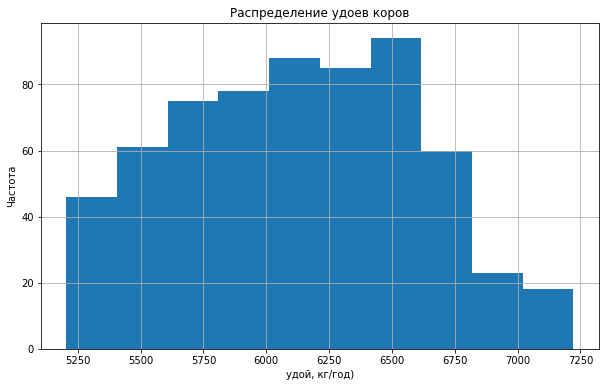

count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: удой, dtype: float64


In [297]:
# Выведем диаграмму распределения удоев коров
a=ferma_main
b='удой'
c='Распределение удоев коров'
d='удой, кг/год)'
e=10
hist_num(a, b, c, d, e)

Распределение нормальное, со средним значением 6126 кг.

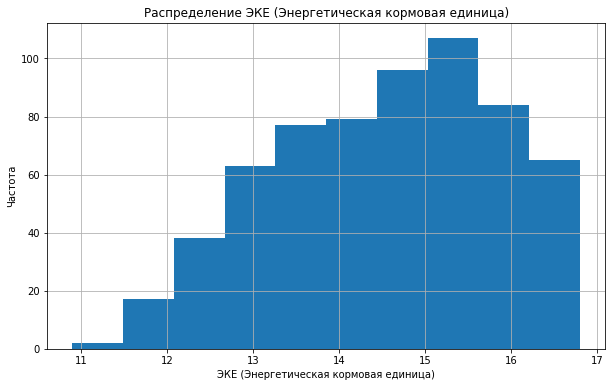

count    628.000000
mean      14.548726
std        1.301777
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: эке, dtype: float64


In [298]:
# Выведем диаграмму распределения ЭКЕ (Энергетическая кормовая единица)
a=ferma_main
b='эке'
c='Распределение ЭКЕ (Энергетическая кормовая единица)'
d='ЭКЕ (Энергетическая кормовая единица)'
e=10
hist_num(a, b, c, d, e)

Распределение близкое к нормальному, со скосом влево.

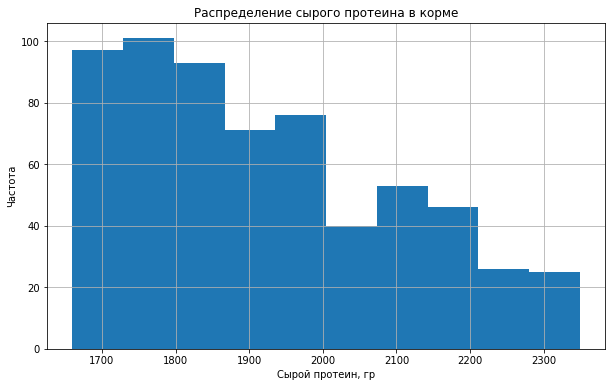

count     628.000000
mean     1923.759554
std       182.832816
min      1660.000000
25%      1771.750000
50%      1888.000000
75%      2062.250000
max      2349.000000
Name: сырой_протеин, dtype: float64


In [299]:
# Выведем диаграмму распределения сырого протеина в корме
a=ferma_main
b='сырой_протеин'
c='Распределение сырого протеина в корме'
d='Сырой протеин, гр'
e=10
hist_num(a, b, c, d, e)

Распределение близкое к нормальному, со скосом вправо.

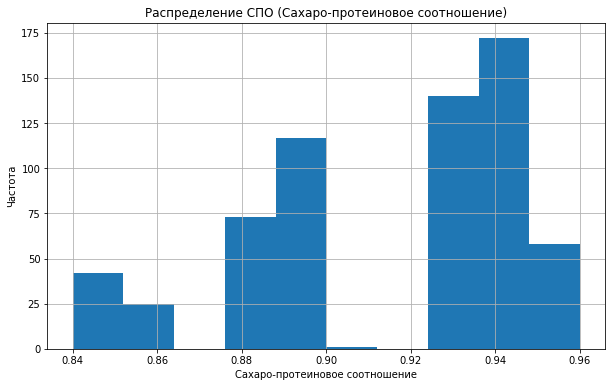

count    628.000000
mean       0.913089
std        0.032221
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: спо, dtype: float64


In [300]:
# Выведем диаграмму распределения СПО (Сахаро-протеиновое соотношение)
a=ferma_main
b='спо'
c='Распределение СПО (Сахаро-протеиновое соотношение)'
d='Сахаро-протеиновое соотношение'
e=10
hist_num(a, b, c, d, e)

Распределение мультимодальное, с тремя пиками на диаграмме. Возможно стоит категоризировать данный параметр, рассмотрим эту опцию в дальнейшем.

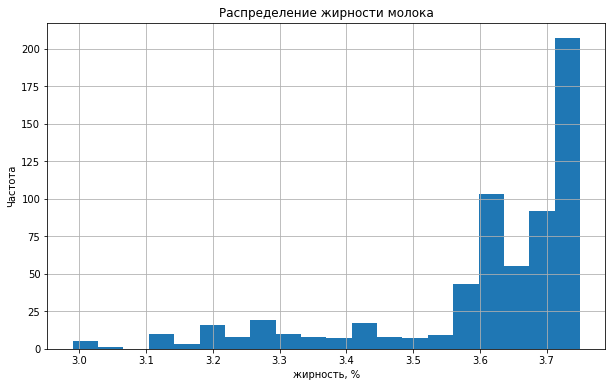

count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: жирность, dtype: float64


In [301]:
# Выведем диаграмму распределения жирности молока
a=ferma_main
b='жирность'
c='Распределение жирности молока'
d='жирность, %'
e=20
hist_num(a, b, c, d, e)

Распределение с сильным скосом влево.

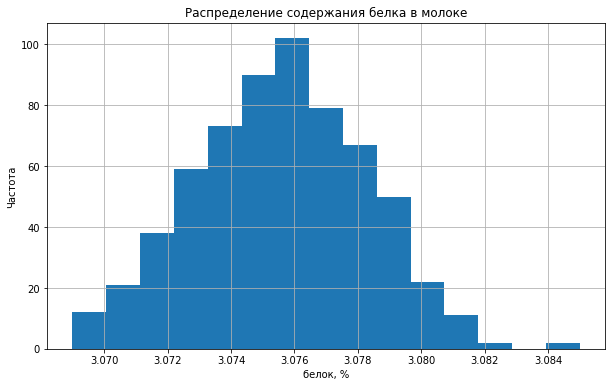

count    628.000000
mean       3.075670
std        0.002551
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: белок, dtype: float64


In [302]:
# Выведем диаграмму распределения содержания белка в молоке
a=ferma_main
b='белок'
c='Распределение содержания белка в молоке'
d='белок, %'
e=15
hist_num(a, b, c, d, e)

Распределение нормальное.

**Датасет cow_buy**

In [303]:
cow_buy

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее 2 лет
2,Рефлешн Соверинг,равнинное,Соверин,Барин,3.59,3.074,более 2 лет
3,Рефлешн Соверинг,холмистое,Айдиал,Буйный,3.40,3.061,более 2 лет
4,Рефлешн Соверинг,равнинное,Айдиал,Буйный,3.64,3.074,более 2 лет
5,Рефлешн Соверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее 2 лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более 2 лет
9,Рефлешн Соверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее 2 лет
10,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более 2 лет


Выведем графики и проанализируем категориальные данные.

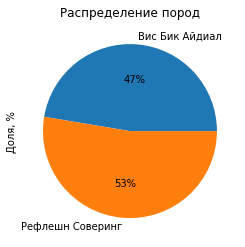

In [304]:
# Выведем диаграмму распределения пород
a=cow_buy
b='порода'
c='Распределение пород'
d='Доля, %'
pie_cat(a, b, c, d)

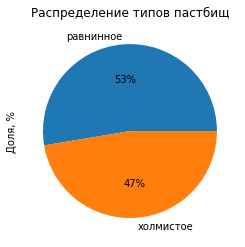

In [305]:
# Выведем диаграмму распределения типов пастбищ
a=cow_buy
b='тип_пастбища'
c='Распределение типов пастбищ'
d='Доля, %'
pie_cat(a, b, c, d)

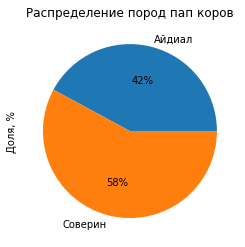

In [306]:
# Выведем диаграмму распределения пород пап коров
a=cow_buy
b='порода_папы_быка'
c='Распределение пород пап коров'
d='Доля, %'
pie_cat(a, b, c, d)

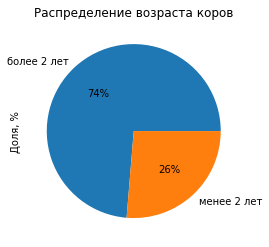

In [307]:
# Выведем диаграмму распределения возраста коров
a=cow_buy
b='возраст'
c='Распределение возраста коров'
d='Доля, %'
pie_cat(a, b, c, d)

Соотношение в данных по породам и типам пастбищ составляет 50/50, возраста коров 69/31, по породам пап составляет 62/38.

Выведем графики и проанализируем числовые данные.

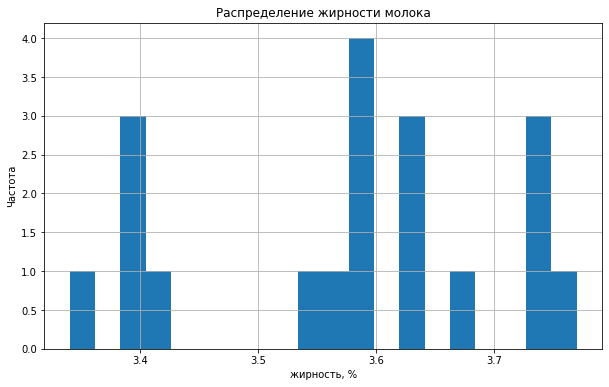

count    19.000000
mean      3.576842
std       0.130258
min       3.340000
25%       3.480000
50%       3.590000
75%       3.660000
max       3.770000
Name: текущая_жирность, dtype: float64


In [308]:
# Выведем диаграмму распределения текущей жирности молока
a=cow_buy
b='текущая_жирность'
c='Распределение жирности молока'
d='жирность, %'
e=20
hist_num(a, b, c, d, e)

Распределение не имеет выраженой формы, выбросов нет.

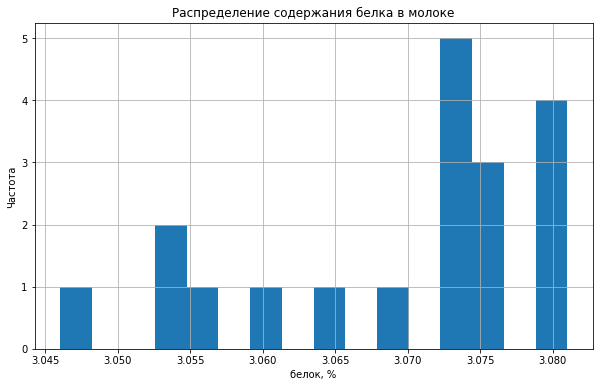

count    19.000000
mean      3.069263
std       0.010566
min       3.046000
25%       3.063000
50%       3.074000
75%       3.076000
max       3.081000
Name: текущий_уровень_белок, dtype: float64


In [309]:
# Выведем диаграмму распределения текущего содержания белка в молоке
a=cow_buy
b='текущий_уровень_белок'
c='Распределение содержания белка в молоке'
d='белок, %'
e=16
hist_num(a, b, c, d, e)

Распределение не имеет выраженой формы, выбросов нет.

## Корреляционный анализ

<AxesSubplot:>

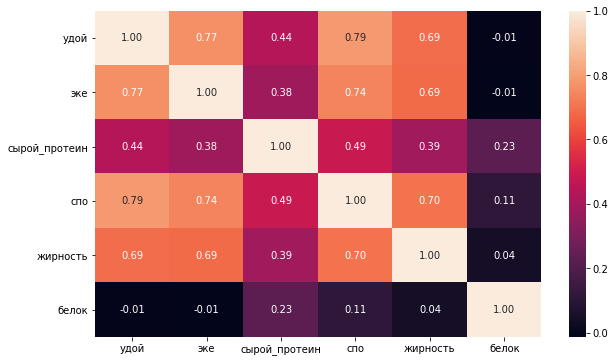

In [310]:
# Выведем тепловую карту корреляции Пирсона
plt.figure(figsize=(10,6))
sns.heatmap(ferma_main.loc[:, 'удой':'белок'].corr(method='spearman'), annot=True, fmt='.2f')

На тепловой карте мы наблюдаем высокий коэффициент корреляции с целевым признаком 'удой' у параметров 'спо' и 'эке', средний у 'жирность' с 'удой','спо'  и 'эке', слабый у параметра 'сырой_протеин' и отсутствие корреляции с параметром 'белок'.
<br>


In [311]:
# Создадим функцию вывода диаграммы рассеяния
def scatterplot_feat (a, b, c, d):
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=a, x=b, y=c, hue=d)
    plt.suptitle(f'Диаграммы рассеяния между признаками\n {b} и {c}')
    print(f'Коэффициент корреляции Пирсона {round(a[c].corr(a[b]), 3)}')

Коэффициент корреляции Пирсона 0.765


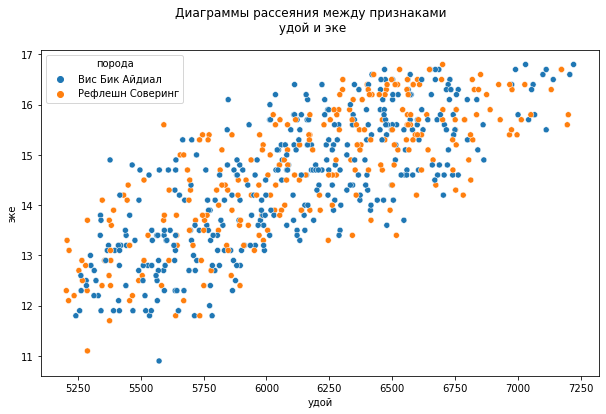

In [312]:
# Выведем диаграмму рассеяния между целевым признаком 'удой' и 'эке', цвет маркеров в соответствии с 'порода'
a=ferma_main
b='удой'
c='эке'
d='порода'
scatterplot_feat(a, b, c, d)

Диаграмма демонстрирует явную корреляцию параметра 'эке' с целевым признаком 'удой'  и отсутствие явной корреляции с 'порода'. При этом корреляция 'эке' с целевым признаком 'удой' носит нелинейный характер, возможно возведение в квадрат параметра 'удой' повысит качество модели ЛР. 

Коэффициент корреляции Пирсона 0.447


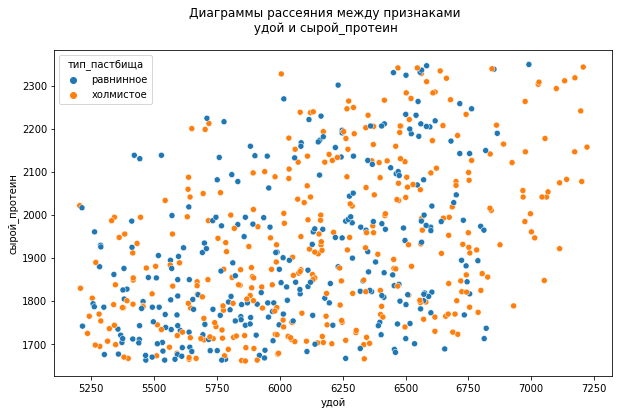

In [313]:
# Выведем диаграмму рассеяния между целевым признаком 'удой' и 'сырой_протеин', цвет маркеров в соответствии с 'тип_пастбища'
a=ferma_main
b='удой'
c='сырой_протеин'
d='тип_пастбища'
scatterplot_feat(a, b, c, d)

Диаграмма демонстрирует слабую корреляцию параметра 'сырой_протеин' с целевым признаком 'удой'  и отсутствие явной корреляции с 'тип_пастбища'.

Коэффициент корреляции Пирсона 0.806


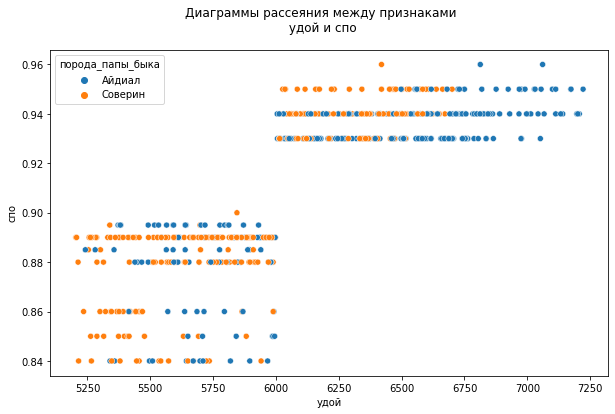

In [314]:
# Выведем диаграмму рассеяния между целевым признаком 'удой' и 'спо', цвет маркеров в соответствии с 'порода_папы_быка'
a=ferma_main
b='удой'
c='спо'
d='порода_папы_быка'
scatterplot_feat(a, b, c, d)

Диаграмма демонстрирует явную корреляцию параметра 'спо' с целевым признаком 'удой'  и некую корреляцию с 'порода_папы_быка' в интервале высоких значений 'удой'.
<br>
Характер распределения параметра 'спо' отмеченный ранее, подтверждает необходимость его категоризации по границе 0.91.

Коэффициент корреляции Пирсона 0.601


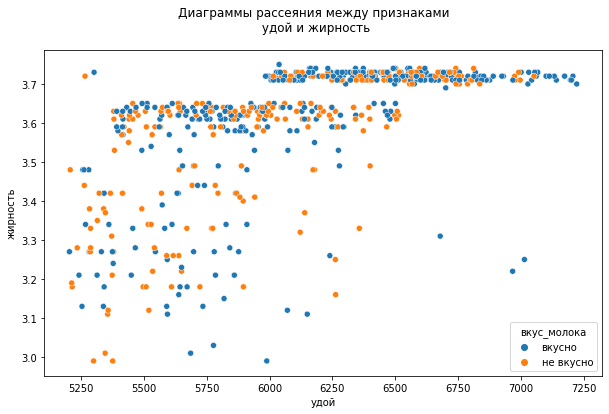

In [315]:
# Выведем диаграмму рассеяния между целевым признаком 'удой' и 'жирность', цвет маркеров в соответствии с 'вкус_молока'
a=ferma_main
b='удой'
c='жирность'
d='вкус_молока'
scatterplot_feat(a, b, c, d)

Диаграмма демонстрирует сложную нелинейную корреляцию параметра 'жирность' с целевым признаком 'удой' и отсутствие явной корреляции с 'вкус_молока'.
<br>
На диаграмме прослеживается корреляционная связь с граничным значением 'жирность' = 3.67%, при жирности выше этого значения удой возврастает не пропорционально интервалу до 3.67%.

Коэффициент корреляции Пирсона 0.003


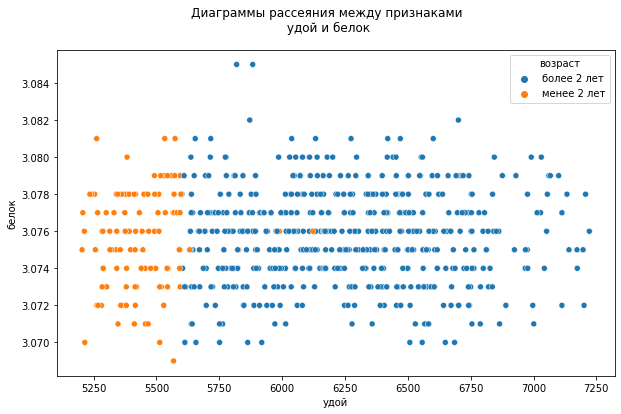

In [316]:
# Выведем диаграмму рассеяния между целевым признаком 'удой' и 'белок', цвет маркеров в соответствии с 'возраст'
a=ferma_main
b='удой'
c='белок'
d='возраст'
scatterplot_feat(a, b, c, d)

Диаграмма демонстрирует отсутствие явной корреляции параметра 'белок' с целевым признаком 'удой'  и явную корреляцию с 'возраст'.

Визуализировали имеющиеся данные, проанализировали распределения и оценили корреляцию данных с целевым признаком.
<br>
Параметр 'белок' слабо коррелируется с 'сырой_протеин' и не коррелируется с остальными параметрами.
<br>
Самый высокий коэффициент корреляции между входными признаками наблюдается у 'спо' и 'эке'. Он составляет 0,75, что не достаточно для проявления эффекта мультиколлинеарности при МО.
<br>
Корреляция 'эке' с целевым признаком 'удой' носит нелинейный характер, возможно возведение в квадрат параметра 'эке' повысит качество модели ЛР.

## Обучение модели линейной регрессии

In [317]:
def LR_func(a, b, c, d): 
    
    # фиксируем случайный выбор при разбитии датасета на выборки
    RANDOM_STATE = 42
    
    # делим столбцы на входные и целевые
    X = a.drop(b, axis=1)
    y = a[b]
    
    # разбиваем датасет на обучающую и тестовую выборки 
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)
    
    ## подготовка признаков для масштабирования и кодирования
    
    # групперуем признаки на категориальные и количественные
    cat_col_names = c
    num_col_names = d
    
    # создаем переменную с экземпляром класса OneHotEncoder()
    encoder = OneHotEncoder(drop='first', sparse=False)
    # обучаем (только _train) и трансформируем категориальные признаки из тренировочной и тестовой выборок
    X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
    X_test_ohe = encoder.transform(X_test[cat_col_names])
    # получаем от кодировщика список новых столбцов
    encoder_col_names = encoder.get_feature_names()
    
    # создаем переменную с экземпляром класса StandardScaler()
    scaler = StandardScaler()
    # обучаем (только _train) и трансформируем количественные признаки из тренировочной и тестовой выборок 
    X_train_scaled = scaler.fit_transform(X_train[num_col_names])
    X_test_scaled = scaler.transform(X_test[num_col_names])
    
    ## создаем тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
    
    # для категориальных данных
    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
    # для количественных данных
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
    # объединяем все преобразованные данные в тренировочный и тестовый датафреймы (сбрасываем индексы)
    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
    
    # инициализируем и обучаем модель на тренировочных данных
    model_lr  = LinearRegression()
    model_lr.fit(X_train, y_train)
    
    # получаем предсказания модели на тестовых данных
    predictions = model_lr.predict(X_test)
    
    # рассчитаем значение метрики для линейной регрессии
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
       
    ## построем графики по количественным признакам — гистограмму частотности распределения и диаграмму рассеяния
    
    # рассчитаем остатки
    residuals = y_test - predictions
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    axes[0].hist(residuals)
    axes[0].set_title('Гистограмма распределения остатков')
    axes[0].set_xlabel('Остатки')
    
    axes[1].scatter(x=predictions, y=residuals)
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии')
    plt.show()
    print(f'R2 = {r2:.3f}')
    print(f'MAE = {mae:.3f}')
    print(f'MSE = {mse:.3f}')
    print(f'RMSE = {rmse:.3f}')
    print('95% доверительный интервал =', st.norm.interval(alpha=0.95, loc=np.mean(predictions), scale=st.sem(predictions)))
    

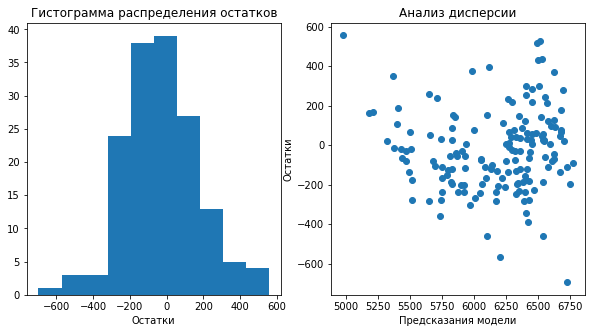

R2 = 0.788
MAE = 161.781
MSE = 43146.800
RMSE = 207.718
95% доверительный интервал = (6106.074234497231, 6230.76923971281)


In [318]:
# Реализуем первую модель
a = ferma_main
b = 'удой'
c = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст']
d = ['эке', 'сырой_протеин', 'спо', 'жирность', 'белок']
LR_func(a, b, c, d)

R2 = 0.784. Распределение остатков нормальное. Дисперсия, в целом, беспорядочная, но с явным увеличением размаха остатков с увеличением параметра 'удой'. 
<br>
Попробуем улучшить модель путем категоризации параметра 'спо' и  возведением параметра 'эке' в квадрат.

In [319]:
ferma_main['спо_bin'] = ferma_main['спо'].apply(lambda x: 1 if x > 0.91 else 0)
ferma_main['эке**2'] = ferma_main['эке'] ** 2

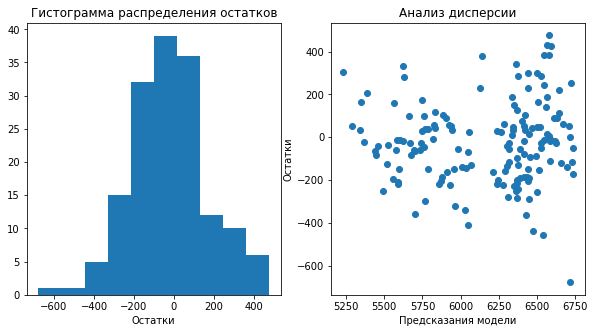

R2 = 0.818
MAE = 149.040
MSE = 37030.911
RMSE = 192.434
95% доверительный интервал = (6103.099544882739, 6228.9581532991515)


In [320]:
# Реализуем вторую модель
a = ferma_main
b = 'удой'
c = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо_bin']
d = ['эке**2', 'сырой_протеин']
LR_func(a, b, c, d)

R2 = 0.818, остальные метрики также улучшились. Преобразования явно пошли на пользу модели.
<br>
Добавим признак 'имя_папы' из датасета ferma_dad и реализуем третью модель.

In [321]:
# Добавим признак 'имя_папы'
ferma_main_dad = pd.merge(ferma_main, ferma_dad)
ferma_main_dad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 627
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                628 non-null    int64  
 1   удой              628 non-null    int64  
 2   эке               628 non-null    float64
 3   сырой_протеин     628 non-null    int64  
 4   спо               628 non-null    float64
 5   порода            628 non-null    object 
 6   тип_пастбища      628 non-null    object 
 7   порода_папы_быка  628 non-null    object 
 8   жирность          628 non-null    float64
 9   белок             628 non-null    float64
 10  вкус_молока       628 non-null    object 
 11  возраст           628 non-null    object 
 12  спо_bin           628 non-null    int64  
 13  эке**2            628 non-null    float64
 14  имя_папы          628 non-null    object 
dtypes: float64(5), int64(4), object(6)
memory usage: 78.5+ KB


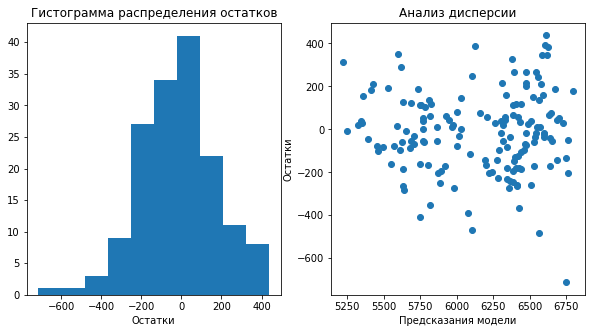

R2 = 0.825
MAE = 146.163
MSE = 35673.890
RMSE = 188.875
95% доверительный интервал = (6092.340075854289, 6221.375070058381)


In [322]:
# Реализуем третью модель
a = ferma_main_dad
b = 'удой'
c = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо_bin', 'имя_папы']
d = ['эке**2', 'сырой_протеин']
LR_func(a, b, c, d)


R2 = 0.825, остальные метрики также снизились. Качество модели повысилось. Увеличение размаха остатков при увеличении удоя снизилось.
<br>
Третья модель показала наилучшие результаты.

Применим ее к датасету cow_buy для прогноза удоя у продаваемых коров.

In [323]:
# Перед этим наполним датасет cow_buy недостающими данными корма, увеличенными на 5%
cow_buy['эке'] = ferma_main_dad['эке'].mean() * 1.05
cow_buy['сырой_протеин'] = ferma_main_dad['сырой_протеин'].mean() * 1.05
cow_buy['спо'] = ferma_main_dad['спо'].mean() * 1.05

In [324]:
# Исправим названия столбцов в cow_buy
cow_buy = cow_buy.rename(columns={'текущая_жирность': 'жирность', 'текущий_уровень_белок': 'белок'})

In [325]:
# Преобразуем данные cow_buy в соответствии с преобразованиями тренировочных данных ferma_main_dad
cow_buy['спо_bin'] = cow_buy['спо'].apply(lambda x: 1 if x > 0.91 else 0)
cow_buy['эке**2'] = cow_buy['эке'] ** 2

In [326]:
cow_buy.head(2)

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст,эке,сырой_протеин,спо,спо_bin,эке**2
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет,15.276162,2019.947532,0.958744,1,233.361138
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее 2 лет,15.276162,2019.947532,0.958744,1,233.361138


In [327]:
ferma_main_dad.head(2)

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст,спо_bin,эке**2,имя_папы
0,1,5863,14.2,1743,0.89,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более 2 лет,0,201.64,Буйный
1,2,5529,12.8,2138,0.89,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее 2 лет,0,163.84,Соловчик


In [328]:
# Обозначаем тренировочные и тестовые данные
X_train = ferma_main_dad
X_test = cow_buy

# Обозначаем целевые и входные данные
target = 'удой'
y_train = X_train[target]
X_train = X_train.drop(target, axis=1)

## подготовка признаков для масштабирования и кодирования

# групперуем признаки на категориальные и количественные
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо_bin', 'имя_папы']
num_col_names = ['эке**2', 'сырой_протеин']

# создаем переменную с экземпляром класса OneHotEncoder()
encoder = OneHotEncoder(drop='first', sparse=False)
# обучаем (только _train) и трансформируем категориальные признаки из тренировочной и тестовой выборок
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
# получаем от кодировщика список новых столбцов
encoder_col_names = encoder.get_feature_names()

# создаем переменную с экземпляром класса StandardScaler()
scaler = StandardScaler()
# обучаем (только _train) и трансформируем количественные признаки из тренировочной и тестовой выборок 
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

## создаем тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных

# для категориальных данных
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
# для количественных данных
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# инициализируем и обучаем модель на тренировочных данных
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)

# получаем предсказания модели на тестовых данных
predictions = model_lr.predict(X_test)

cow_buy['удой'] = predictions
cow_buy.sort_values(by = 'удой', ascending = False)

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст,эке,сырой_протеин,спо,спо_bin,эке**2,удой
15,Рефлешн Соверинг,холмистое,Айдиал,Буйный,3.40,3.065,более 2 лет,15.276162,2019.947532,0.958744,1,233.361138,6593.677429
3,Рефлешн Соверинг,холмистое,Айдиал,Буйный,3.40,3.061,более 2 лет,15.276162,2019.947532,0.958744,1,233.361138,6593.677429
11,Рефлешн Соверинг,равнинное,Соверин,Геркулес,3.73,3.073,более 2 лет,15.276162,2019.947532,0.958744,1,233.361138,6589.281700
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет,15.276162,2019.947532,0.958744,1,233.361138,6583.691248
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет,15.276162,2019.947532,0.958744,1,233.361138,6583.691248
12,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.68,3.046,более 2 лет,15.276162,2019.947532,0.958744,1,233.361138,6583.691248
19,Рефлешн Соверинг,равнинное,Айдиал,Буйный,3.64,3.074,более 2 лет,15.276162,2019.947532,0.958744,1,233.361138,6545.136866
4,Рефлешн Соверинг,равнинное,Айдиал,Буйный,3.64,3.074,более 2 лет,15.276162,2019.947532,0.958744,1,233.361138,6545.136866
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более 2 лет,15.276162,2019.947532,0.958744,1,233.361138,6531.868301
18,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.34,3.069,более 2 лет,15.276162,2019.947532,0.958744,1,233.361138,6531.868301


Полученный результат свидетельствует о том, что для всех коров прогнозируется удой более 6000 кг. 

## Обучение модели логистической регрессии

In [329]:
# Преобразуем целевой признак
ferma_main_dad['вкус_молока'] = ferma_main_dad['вкус_молока'].apply(lambda x: 1 if x == 'вкусно' else 0)

acc = 0.624
precision = 0.618
recall = 0.864


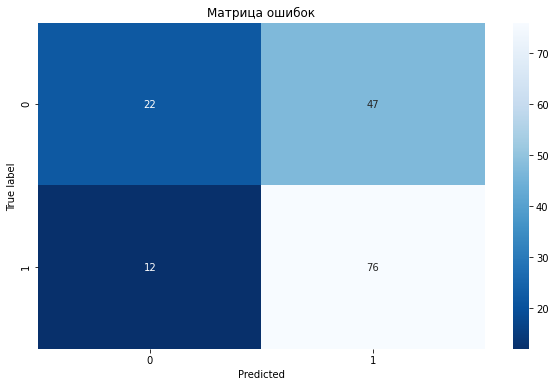

In [330]:
# фиксируем случайный выбор при разбитии датасета на выборки
RANDOM_STATE = 42

# делим столбцы на входные и целевые
X = ferma_main_dad.drop('вкус_молока', axis=1)
y = ferma_main_dad['вкус_молока']

# разбиваем датасет на обучающую и тестовую выборки 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

## подготовка признаков для масштабирования и кодирования

# групперуем признаки на категориальные и количественные
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо_bin', 'имя_папы']
num_col_names = ['удой', 'эке**2', 'сырой_протеин', 'жирность', 'белок']

# создаем переменную с экземпляром класса OneHotEncoder()
encoder = OneHotEncoder(drop='first', sparse=False)
# обучаем (только _train) и трансформируем категориальные признаки из тренировочной и тестовой выборок
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
# получаем от кодировщика список новых столбцов
encoder_col_names = encoder.get_feature_names()

# создаем переменную с экземпляром класса StandardScaler()
scaler = StandardScaler()
# обучаем (только _train) и трансформируем количественные признаки из тренировочной и тестовой выборок 
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

## создаем тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
    
# для категориальных данных
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
# для количественных данных
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
# объединяем все преобразованные данные в тренировочный и тестовый датафреймы (сбрасываем индексы)
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# создаём объект для работы с моделью
clf = LogisticRegression()

# обучаем модель на данных
clf = clf.fit(X_train, y_train)

# получаем прогнозные метки классов
y_pred = clf.predict(X_test)

# проводим оценку точности
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) 
recall = recall_score(y_test, y_pred)

# Вывобим матрицу ошибок
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted');
plt.title('Матрица ошибок')

print(f'acc = {acc:.3f}')
print(f'precision = {precision:.3f}')
print(f'recall = {recall:.3f}')

Так как нам необходимо отобрать коров с гарантированно вкусным молоком, нам следует воспользоваться метрикой precision. То есть снизить ложноположительные предсказания с 47 до 0.

In [331]:
# выведем целевые признаки, их предсказания и вероятности их принадлежности к классу 1
y_proba = clf.predict_proba(X_test)[:,1]
data = pd.DataFrame(zip(y_test, y_proba, y_pred), columns = ['y_test', 'y_proba', 'y_pred'])
# Отсортируем по вероятности и посмотрим первые 20 строк
data.sort_values(by='y_proba',ascending=False).head(20)

,y_test,y_proba,y_pred
85,1,0.859772,1
51,1,0.851867,1
66,1,0.842129,1
110,1,0.838929,1
13,1,0.825786,1
8,1,0.824128,1
147,1,0.813126,1
4,1,0.811900,1
108,0,0.804053,1
69,1,0.802497,1


Мы видим первое ложноположительное предсказание уже на вероятности 0.804, второе на 0.796. Следовательно, при пороге 0.8 мы получим максимальное значение precision не равное единице, а при пороге 0.81 мы получим precision равное единице. Проверим это на матрице ошибок

precision = 0.909


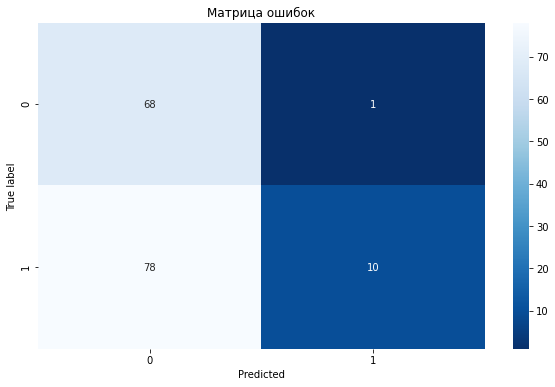

In [332]:
# Выводим матрицу ошибок с порогом 0.8
y_pred = clf.predict_proba(X_test)[:,1] > 0.8
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted');
plt.title('Матрица ошибок')
precision = precision_score(y_test, y_pred)
print(f'precision = {precision:.3f}')

precision = 1.000


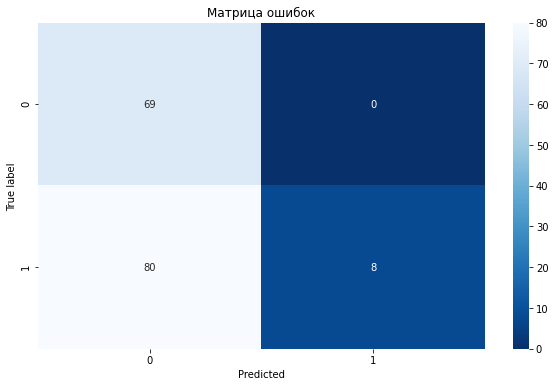

In [333]:
# Выводим матрицу ошибок с порогом 0.81
y_pred = clf.predict_proba(X_test)[:,1] > 0.81
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted');
plt.title('Матрица ошибок')
precision = precision_score(y_test, y_pred)
print(f'precision = {precision:.3f}')

Модель настроена, можно применять ее на cow_buy.

In [334]:
# Обозначаем тренировочные и тестовые данные
X_train = ferma_main_dad
X_test = cow_buy

# делим столбцы на входные и целевые
X_train = ferma_main_dad.drop('вкус_молока', axis=1)
y_train = ferma_main_dad['вкус_молока']

## подготовка признаков для масштабирования и кодирования

# групперуем признаки на категориальные и количественные
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'спо_bin', 'имя_папы']
num_col_names = ['удой', 'эке**2', 'сырой_протеин', 'жирность', 'белок']

# создаем переменную с экземпляром класса OneHotEncoder()
encoder = OneHotEncoder(drop='first', sparse=False)
# обучаем (только _train) и трансформируем категориальные признаки из тренировочной и тестовой выборок
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
# получаем от кодировщика список новых столбцов
encoder_col_names = encoder.get_feature_names()

# создаем переменную с экземпляром класса StandardScaler()
scaler = StandardScaler()
# обучаем (только _train) и трансформируем количественные признаки из тренировочной и тестовой выборок 
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

## создаем тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
    
# для категориальных данных
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
# для количественных данных
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
# объединяем все преобразованные данные в тренировочный и тестовый датафреймы (сбрасываем индексы)
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# создаём объект для работы с моделью
clf = LogisticRegression()

# обучаем модель на данных
clf = clf.fit(X_train, y_train)

# получаем прогнозные вероятности вкусного молока
y_pred = clf.predict_proba(X_test)[:,1]
# Добавляем столбец с вероятностями
cow_buy['y_pred'] = y_pred

# формируем столбец 'вкус_молока' с учетом граничного значения вероятности 0.8
cow_buy['вкус_молока'] = cow_buy['y_pred'].apply(lambda x: 'вкусно' if x > 0.8 else 'не вкусно')

cow_buy.sort_values(by = 'y_pred', ascending = False)

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст,эке,сырой_протеин,спо,спо_bin,эке**2,удой,y_pred,вкус_молока
9,Рефлешн Соверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее 2 лет,15.276162,2019.947532,0.958744,1,233.361138,6375.747238,0.736431,не вкусно
13,Вис Бик Айдиал,холмистое,Соверин,Барин,3.42,3.075,менее 2 лет,15.276162,2019.947532,0.958744,1,233.361138,6098.151316,0.700932,не вкусно
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет,15.276162,2019.947532,0.958744,1,233.361138,6583.691248,0.689758,не вкусно
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет,15.276162,2019.947532,0.958744,1,233.361138,6583.691248,0.689758,не вкусно
16,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.079,более 2 лет,15.276162,2019.947532,0.958744,1,233.361138,6351.885016,0.688425,не вкусно
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее 2 лет,15.276162,2019.947532,0.958744,1,233.361138,6313.938111,0.633395,не вкусно
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более 2 лет,15.276162,2019.947532,0.958744,1,233.361138,6531.868301,0.614522,не вкусно
2,Рефлешн Соверинг,равнинное,Соверин,Барин,3.59,3.074,более 2 лет,15.276162,2019.947532,0.958744,1,233.361138,6301.240734,0.523331,не вкусно
14,Рефлешн Соверинг,равнинное,Соверин,Барин,3.59,3.074,более 2 лет,15.276162,2019.947532,0.958744,1,233.361138,6301.240734,0.523331,не вкусно
19,Рефлешн Соверинг,равнинное,Айдиал,Буйный,3.64,3.074,более 2 лет,15.276162,2019.947532,0.958744,1,233.361138,6545.136866,0.507403,не вкусно


Устанавливая граничное значение вероятности 0.8 с целью исключения ложноположительных результатов, мы получили результат 'не вкусно' для всех коров. В таком случае, при отборе коров с вкусным молоком следует ориентироваться на значения вероятности 'y_pred'.

## Итоговые выводы

In [335]:
cow_buy.loc[(cow_buy['удой'] >= 6000) & (cow_buy['вкус_молока'] == 'вкусно')]

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст,эке,сырой_протеин,спо,спо_bin,эке**2,удой,y_pred,вкус_молока


<br>В процессе работы мы ознакомились с данными, полученными от молочного хозяйства «Вольный луг» с и ассоциации пастбищ «ЭкоФерма».
<br>На этапе предобработки данных мы проверили датасеты на наличие пропусков (не обнаружено), выявили и удалили явные дубликаты, обработали неявные дубликаты. Оптимизировали стиль строчных данных и заголовков столбцов. Удалили выброс в данных параметра 'удой'.
<br>Провели исследовательский и корреляционный анализ данных, визуализировали их в различных сочетаниях, проанализировали распределения и оценили корреляцию данных с целевым признаком. Выявили что параметр 'белок' слабо коррелируется с 'сырой_протеин' и не коррелируется с остальными параметрами. При этом самый высокий коэффициент корреляции между входными признаками наблюдается у 'спо' и 'эке'. В тоже время, он составляет 0,75, что не достаточно для проявления эффекта мультиколлинеарности при машинном обучении. Также отметили, что корреляция 'эке' с целевым признаком 'удой' носит нелинейный характер, из-за чего в последствии возвели в квадрат параметр 'эке' чтобы повысить качество моделей.
<br>Обучение модели логистической регрессии. Целевым признаком был 'удой'. 
<br>На этапе обучения модели линейной регрессии мы обучили первую модель с базовым набором входных признаков, получили результат R2 = 0.788. 
<br>При обучении второй модели мы категоризировали признак 'спо' и возвели в квадрат параметр 'эке', в результате получили уже R2 = 0.819. 
<br>При обучении третьей модели мы добавили категориальный признак 'имя_папы' из данных ferma_dad.csv, в результате получили R2 = 0.825 с улучшением по остальным метрикам качества модели и выбрали эту модель для предсказания удоев коров «ЭкоФермы».
<br>
<br>
С помощью лучшей модели мы спрогнозировали удой коров, которых фермер хочет купить. При этом добавили недостающие признаки ЭКЕ, Сырой протеин и СПО мы взяли из датасета ferma_main.csv путем усреднения значения каждого из признаков и увеличив их на 5%.
Также выполнили подготовку данных, аналогичную той, которую делали для тренировочной выборки. Получили прогноз удоя всех коров более 6000 кг (условие фермера), т.е. все коровы по этому критерию подходят под требования фермера.
<br>
<br>
При обучении логистической регрессии использовали в качестве целевого признак Вкус молока. Обучили модель логистической регрессии на подготовленных данных, оценили качество модели на тестовой выборке, рассчитали метрики accuracy, recall и precision. Построили матрицу ошибок, проанализировали метрики и выбрали precision в качестве ключевой метрики для минимизации рисков ложноположительных результатов, так как главное для заказчика — вкусное молоко. В процессе настройки модели выбрали граничным значением вероятности вкусного молока 0.81, при котором precision = 1.
<br>В результате, по прогнозу с таким граничным значением у всех коров «ЭкоФермы» молоко прогнозируется не вкусным. 
<br>
<br>
Согласно заданию, с помощью модели нам нужно было отобрать коров по двум критериям:
<br>средний удой за год не менее 6000 килограммов - в результате все коровы прогнозируются с удоем более 6000 килограммов
<br>молоко должно быть вкусным - под условия гарантировано вкусного молока не проходит ни одна корова
<br>
<br>


Рекомендуем при выборе коров ориентироваться на значения вероятности вкусного молока, для этого необходимо снизить граничное значение до необходимого уровня с учетом разумного уровня риска по метрике precision. 
<br>
Также рекомендуется запросить данные по корму (ЭКЕ, СПО и сырой протеин) для коров "Экофермы" для более точного проноза удоя и вкуса молока.